# t-SNE


In [0]:
import codecs
import os
import re
import pickle
import tqdm

import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline

import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
PATH_TO_DATA = '/content/drive/My Drive/MusicRecommenderDSMinor/'

***

Обучаем модель на 3М

In [0]:
with open(os.path.join(PATH_TO_DATA,'data/music_lists_3m.csv'), 'w') as f:
  # chunks - удобно для обработки больших по размеру датасетов
  for chunk in pd.read_csv(os.path.join(PATH_TO_DATA, 'data/dataset_anon.csv'), 
                           header=None, iterator=True, chunksize=100000, nrows=3000000 ,
                           lineterminator='\n', error_bad_lines=False):
    chunk.columns = ['user', 'song', 'artist']
    chunk['artist'] = chunk['artist'].astype(str)
    # group & join
    chunk = chunk.groupby('user')['artist'].apply(','.join).reset_index()
    
    for row in chunk.iterrows():
      f.write(row[1]['artist'] + '\n')

In [0]:
class TextToW2V(object):
    def __init__(self, file_path):
        self.file_path = file_path
    def __iter__(self):
        for line in open(self.file_path, 'r'):
            yield line.lower().split(',')[::-1]  # reverse order (make old -> new)

music_collections = TextToW2V(os.path.join(PATH_TO_DATA, 'data/music_lists_3m.csv'))  # !

In [0]:
%%time
estimator = gensim.models.Word2Vec(music_collections
                                   , window=15 #  num words around target word to consider
                                   , min_count=30 # minimum word count threshold
                                   , sg=1, workers=4, iter=10)
estimator.save(os.path.join(PATH_TO_DATA,'models/w2v_3m.model'))

CPU times: user 7min 41s, sys: 1.64 s, total: 7min 43s
Wall time: 4min 55s


In [0]:
model = Word2Vec.load(os.path.join(PATH_TO_DATA, 'models/w2v_3m.model'))

In [0]:
words = []
embeddings = []
for word in list(model.wv.vocab):
    embeddings.append(model.wv[word])
    words.append(word)
    
tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=42)
embeddings_2d = tsne_2d.fit_transform(embeddings)

In [0]:
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.savefig(os.path.join(PATH_TO_DATA, 'w2v_3m.png'), format='png', dpi=150, bbox_inches='tight')
    plt.show()

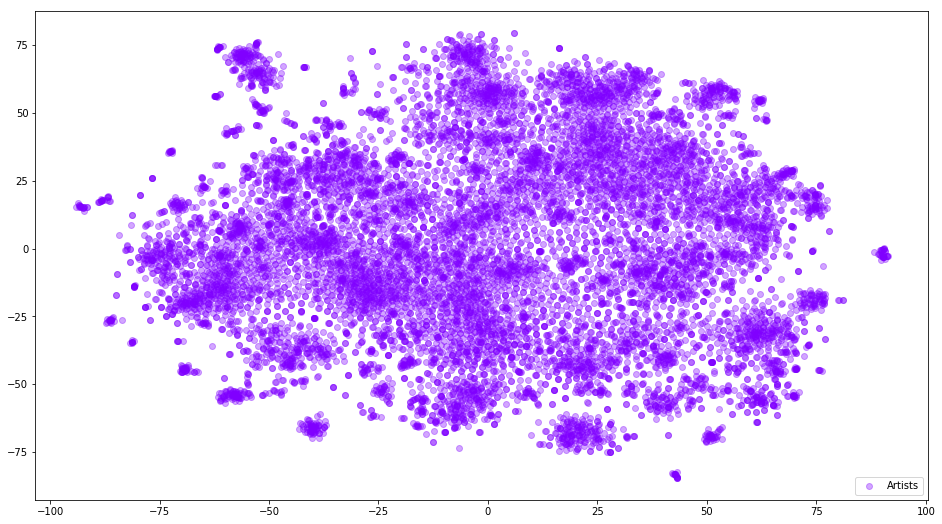

In [0]:
tsne_plot_2d('Artists', embeddings_2d, a=0.35)

In [0]:
# model_10m = Word2Vec.load(os.path.join(PATH_TO_DATA, 'models/w2v_10m.model'))
# words_10m = []
# embeddings_10m = []
# for word in list(model_10m.wv.vocab):
#     embeddings_10m.append(model_10m.wv[word])
#     words_10m.append(word)
# tsne_10m = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2000, random_state=42)  # 3500  32
# embeddings_10m_2d = tsne_10m.fit_transform(embeddings_10m)

Можно и в 3D:

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
words_3d = []
embeddings_3d = []
for word in list(model.wv.vocab):
    embeddings_3d.append(model.wv[word])
    words_3d.append(word)

In [0]:
%%time
tsne_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=2500, random_state=42)
embeddings_3d = tsne_3d.fit_transform(embeddings_3d)

CPU times: user 53min 18s, sys: 3.21 s, total: 53min 21s
Wall time: 53min 19s


In [0]:
def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()
    plt.savefig(os.path.join(PATH_TO_DATA, 'w2v_3m_3d.png'), format='png', dpi=150, bbox_inches='tight')

In [0]:
sns.set(rc={'figure.figsize':(8,6)},style='whitegrid')

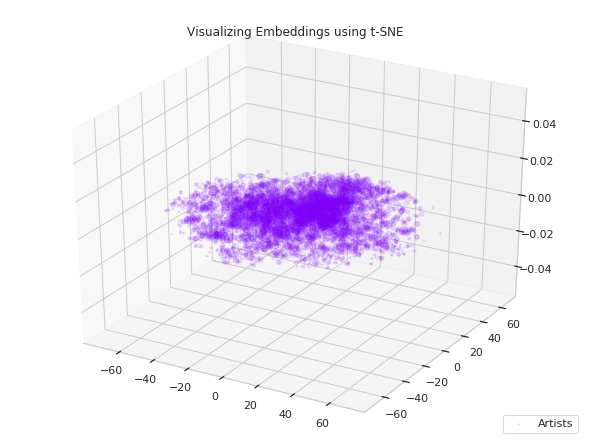

<Figure size 576x432 with 0 Axes>

In [0]:
tsne_plot_3d('Visualizing Embeddings using t-SNE', 'Artists', embeddings_3d, a=0.1)

***